In [127]:
import random
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

!pip install mglearn
import mglearn

## Logistic Regression

TO DO: define two functions GetClass1(X) and GetClass2(X)

* GetClass1(X) returns (X * 0.5 + np.abs(np.sin(X * np.pi / 180)) * 180 + np.random.normal(0, 30, len(X)))
* GetClass2(X) returns (X * 0.5 + 50 - np.abs(np.cos(X * np.pi / 180)) * 180 + np.random.normal(0, 30, len(X)))


In [128]:
def GetClass1(X): 
  return  (X * 0.5 + np.abs(np.sin(X * np.pi / 180)) * 180 + np.random.normal(0, 30, len(X)))

def GetClass2(X):
  return (X * 0.5 + 50 - np.abs(np.cos(X * np.pi / 180)) * 180 + np.random.normal(0, 30, len(X)))


TO DO:
* Set random seed by 12 using np.random.seed()
* Create an array composed of 100 numbers from 0 to 360
* Draw plot using X and GetClass1(X)
* Draw plot using X and GetClass2(X)

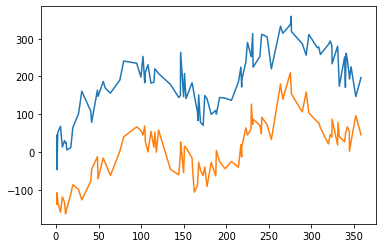

In [129]:
np.random.seed(12)
array =np.random.rand(100)*360
array.sort()
# array = np.linspace(0,360,100)

plt.plot(array,GetClass1(array))
plt.plot(array,GetClass2(array))


TO DO: Create class 1 samples
* Create an array $x_{11}$ composed of 50 random numbers between 0 and 360.
* Create an array $x_{12}$ by GetClass1($x_{11}$).
* Create an array $y_1$ of size 50 filled with zeros.
* Combine $x_{11}$, $x_{12}$ and $y_1$ to make a 50x3 array $d_1$. (Use np.expand_dims() and np.concatenate().)
* print the first 10 rows of $d_1$

In [130]:
x11 = (np.random.random(50)*360)
x12 = GetClass1(x11)
y1 = np.zeros(50)
x11 = np.expand_dims(x11, axis=1)
x12 = np.expand_dims(x12, axis=1)
y1 = np.expand_dims(y1, axis=1)

d1 = np.concatenate((x11,x12,y1), axis=1)
print("d1 =",d1[:10])


d1 = [[183.19772886 100.32405769   0.        ]
 [135.09834791 174.61906521   0.        ]
 [215.19059907 249.28792585   0.        ]
 [231.17874671 266.34716229   0.        ]
 [352.27074445 222.47410728   0.        ]
 [223.75375028 197.35319227   0.        ]
 [141.62415538 167.2182884    0.        ]
 [336.54181381 219.14007067   0.        ]
 [263.45546867 305.04927969   0.        ]
 [155.00506744 204.03071115   0.        ]]


TO DO: Create class 2 samples
* Create an array $x_{21}$ composed of 50 random numbers between 0 and 360.
* Create an array $x_{22}$ by GetClass2($x_{21}$).
* Create an array $y_2$ of size 50 filled with ones.
* Combine $x_{21}$, $x_{22}$ and $y_2$ to make a 50x3 array $d_2$. (Use np.expand_dims() and np.concatenate().)
* print the first 10 rows of $d_2$

In [131]:
x21 = (np.random.random(50)*360)
x22 = GetClass2(x21)
y2 = np.ones(50)
x21 = np.expand_dims(x21, axis=1)
x22 = np.expand_dims(x22, axis=1)
y2 = np.expand_dims(y2, axis=1)

d2 = np.concatenate((x21,x22,y2), axis=1)
print("d2 =",d2[:10])


d2 = [[287.36296718 161.2100446    1.        ]
 [124.49730152  -1.84997299   1.        ]
 [ 71.59247151   3.78188461   1.        ]
 [275.62320112 134.64257728   1.        ]
 [ 23.64024695 -38.88820042   1.        ]
 [ 34.41090129 -47.22891939   1.        ]
 [  9.8996957  -78.72898089   1.        ]
 [288.60772221 132.45132641   1.        ]
 [127.23342611  65.52872268   1.        ]
 [ 74.26367653  53.74222051   1.        ]]


TO DO: Make X and y from $d_1$ and $d_2$.
* Combine $d_1$ and $d_2$ to make a 100x3 array $d$.
* Shuffle the row of $d$ using np.random.shuffle().
* Create a 100x2 array $X$ by the first two columns of $d$.
* Create a single rank array $y$ by the last column of $d$.
* Print the first 10 rows of X
* Print the first 10 elements of y

In [132]:
d = np.concatenate((d1,d2),axis=0)
np.random.shuffle(d)
X = d[:,:2]
y = np.squeeze(d[:,2:])

print("X = ",X[:10])
print("y = ",y[:10])

X =  [[ 131.2984665    53.9706863 ]
 [ 268.54232799  198.95394185]
 [ 301.88410437  103.74589326]
 [ 288.60772221  132.45132641]
 [ 304.54386142  284.44536016]
 [ 186.08462441  -76.41109872]
 [ 165.42616565  204.00572653]
 [  18.86552894 -103.63863971]
 [  29.82627818 -121.59863605]
 [  14.15879432 -177.51815561]]
y =  [1. 1. 1. 1. 0. 1. 0. 1. 1. 1.]


TO DO: Draw scatter chart using mglearn.discrete_scatter()

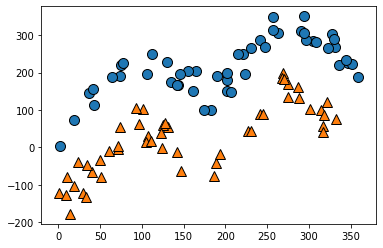

In [133]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)

TO DO: split X and y into a training set and a test set using train_test_split()

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0) 

TO DO: Create a LogisticRegression object and train with the training samples

In [135]:
from sklearn.linear_model import LogisticRegression
Logi_Reg = LogisticRegression().fit(X_train,y_train)

TO DO: Compare the predicted values with the ground truth values.
* Predict y of the test input samples (e.g., X_test) using the LogisticRegression object
* Compare the predicted values and the groud truth values as the output example.

In [136]:
y_predict= Logi_Reg.predict(X_test)

for predictValue, groudTruth in zip(y_predict,y_test):
  print("{} vs. {} (match = {})".format(predictValue,groudTruth,predictValue==groudTruth))

0.0 vs. 0.0 (match = True)
0.0 vs. 1.0 (match = False)
1.0 vs. 1.0 (match = True)
1.0 vs. 1.0 (match = True)
1.0 vs. 1.0 (match = True)
0.0 vs. 0.0 (match = True)
1.0 vs. 0.0 (match = False)
1.0 vs. 1.0 (match = True)
0.0 vs. 0.0 (match = True)
0.0 vs. 0.0 (match = True)
0.0 vs. 0.0 (match = True)
0.0 vs. 0.0 (match = True)
0.0 vs. 0.0 (match = True)
1.0 vs. 1.0 (match = True)
1.0 vs. 1.0 (match = True)
1.0 vs. 1.0 (match = True)
0.0 vs. 0.0 (match = True)
0.0 vs. 0.0 (match = True)
0.0 vs. 1.0 (match = False)
1.0 vs. 1.0 (match = True)
1.0 vs. 1.0 (match = True)
1.0 vs. 1.0 (match = True)
1.0 vs. 1.0 (match = True)
1.0 vs. 1.0 (match = True)
1.0 vs. 1.0 (match = True)


TO DO: Print the training accuracy and test accuracy

In [137]:
print("training accuracy = {}".format(Logi_Reg.score(X_train, y_train)))
print("test accuracy = {}".format(Logi_Reg.score(X_test, y_test)))

training accuracy = 0.9066666666666666
test accuracy = 0.88


### Ridge regression

TO DO: Create input and output samples
* Create a 100x1 array $X$ composed of 100 numbers from 0 to 100.
* Create a 1D array $y$ from the 1st column of $X$ using the following formula: $y = (x-30)^2+100 + \epsilon$, where $\epsilon \in N(0, 100^2)$.
* Draw graph with X and y using plt.plot()

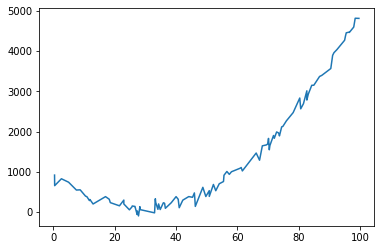

In [138]:
def theFormula(X): 
  return  ((X - 30)**2 + 100 + np.random.normal(0,100,len(X)))

X = np.random.random(100)*100
X.sort()
y = theFormula(X)
X = X.reshape(-1,1)



plt.plot(X,y)

TO DO: Create an object of Ridge and train it with $X$ and $y$.

In [139]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X,y)

TO DO: Plot $X$, $y$ and the prediction of Ridge from $X$.

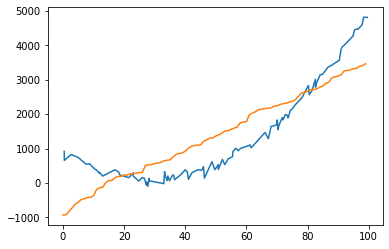

In [140]:
y_hat = ridge.predict(X)

plt.plot(X,y)
plt.plot(y_hat)


### Polynomial regression

TO DO: Create a 100x2 array $X_2$ derived from $X$.
* The first column is the same as $X$.
* The second column is composed of $X[i,0]^2$'s.
* Print the first 10 rows of $X_2$.

In [141]:
X2 = np.concatenate((X,X**2),axis=1)
print(X2[:10])

[[  0.42764435   0.18287969]
 [  0.46982259   0.22073327]
 [  2.6615067    7.08361792]
 [  4.99418432  24.94187702]
 [  7.54796988  56.97184934]
 [  8.77573086  77.0134522 ]
 [ 10.52607388 110.79823135]
 [ 10.94604701 119.81594518]
 [ 11.79614301 139.14899002]
 [ 11.93993441 142.56203367]]


To DO: Create another Ridge object and training it with $X_2$ and $y$

In [142]:
anotherRidge = Ridge().fit(X2,y)

TO DO: Plot $X_2[:,0]$, $y$ and the prediction of Ridge from $X_2$.

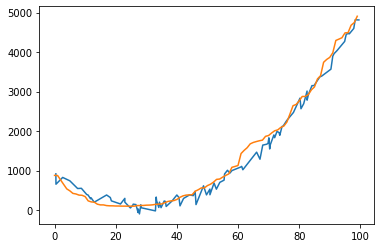

In [143]:

anotherY_hat = anotherRidge.predict(X2)
plt.plot(X[:,0],y)
plt.plot(anotherY_hat)